# Import thư viện cần thiết

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

# Quan sát và loại bỏ NULL trong dữ liệu

- Dữ liệu phân tích giá cổ phiếu theo thời gian
    - Bỏ 5 dòng đầu tiên, đọc 1001 dòng
- Dữ liệu phân tích chỉ số tài chính
    - Bỏ 6 dòng đầu tiên, đọc 63 dòng

In [ ]:
df_price_history = pd.read_excel("./datamining-data/Simplize_HPG_PriceHistory_20250315.xlsx", skiprows=5, nrows=1001)
df_financial_indicator = pd.read_excel("./datamining-data/Simplize_HPG_FinancialIndicator_20250315.xlsx", skiprows=6, nrows=63)

/home/tngtwx/miniconda3/envs/datamining/lib/python3.14/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/home/tngtwx/miniconda3/envs/datamining/lib/python3.14/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


- Xem qua 2 DataFrame

In [ ]:
df_price_history.head(5)

,NGÀY,GIÁ MỞ CỬA,GIÁ CAO NHẤT,GIÁ THẤP NHẤT,GIÁ ĐÓNG CỬA,THAY ĐỔI GIÁ,% THAY ĐỔI,KHỐI LƯỢNG
0,14/03/2025,27700.0,27850.0,27550.0,27550.0,-150.0,-0.005415,18279900
1,13/03/2025,27850.0,28050.0,27700.0,27700.0,-100.0,-0.003597,24809400
2,12/03/2025,28200.0,28200.0,27800.0,27800.0,-350.0,-0.012433,20641600
3,11/03/2025,27600.0,28150.0,27600.0,28150.0,200.0,0.007156,26088500
4,10/03/2025,28100.0,28200.0,27950.0,27950.0,-100.0,-0.003565,23580500


In [ ]:
df_financial_indicator.head(5)

,CHỈ TIÊU,Q4/2024,Q3/2024,Q2/2024,Q1/2024,Q4/2023,Q3/2023,Q2/2023,Q1/2023,Q4/2022,...,Q2/2017,Q1/2017,Q4/2016,Q3/2016,Q2/2016,Q1/2016,Q4/2015,Q3/2015,Q2/2015,Q1/2015
0,Chỉ tiêu Báo cáo kết quả kinh doanh (Tỷ đồng),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Doanh thu thuần,3.449098e+13,3.395626e+13,3.955551e+13,3.085236e+13,3.438380e+13,2.848409e+13,2.949638e+13,2.658875e+13,2.582573e+13,...,1.061208e+13,1.026475e+13,9.950500e+12,8.142079e+12,8.048250e+12,7.142387e+12,7.121777e+12,6.845199e+12,7.647766e+12,5.837936e+12
2,Tăng trưởng doanh thu,3.100000e-03,1.921000e-01,3.410000e-01,1.604000e-01,3.314000e-01,-1.648000e-01,-2.118000e-01,-3.965000e-01,-4.224000e-01,...,3.186000e-01,4.372000e-01,3.972000e-01,1.895000e-01,5.240000e-02,2.234000e-01,8.210000e-02,1.911000e-01,1.447000e-01,-1.040000e-01
3,Lợi nhuận gộp,4.364909e+12,4.731177e+12,5.247480e+12,4.153983e+12,4.471610e+12,3.594807e+12,3.194987e+12,1.676437e+12,-8.852499e+11,...,2.188958e+12,2.463498e+12,2.639127e+12,2.116908e+12,2.571508e+12,1.430865e+12,1.304848e+12,1.560486e+12,1.699381e+12,1.016004e+12
4,Tăng trưởng lợi nhuận gộp,-2.390000e-02,3.161000e-01,6.424000e-01,1.477900e+00,6.051200e+00,2.592200e+00,-5.114000e-01,-8.342000e-01,-1.092300e+00,...,-1.488000e-01,7.217000e-01,1.022600e+00,3.566000e-01,5.132000e-01,4.083000e-01,2.615000e-01,1.734000e-01,1.861000e-01,-2.689000e-01


#### Check qua số lượng NULL trong mỗi cột của mỗi DataFrame

In [ ]:
price_history_null_count = df_price_history.isnull().sum()
price_history_null_count

NGÀY               0
GIÁ MỞ CỬA         0
GIÁ CAO NHẤT       0
GIÁ THẤP NHẤT      0
GIÁ ĐÓNG CỬA       0
THAY ĐỔI GIÁ     453
% THAY ĐỔI       453
KHỐI LƯỢNG         0
dtype: int64

In [ ]:
financial_indicator_null_count = df_financial_indicator.isnull().sum()
financial_indicator_null_count

CHỈ TIÊU    0
Q4/2024     9
Q3/2024     8
Q2/2024     8
Q1/2024     9
Q4/2023     9
Q3/2023     9
Q2/2023     8
Q1/2023     8
Q4/2022     8
Q3/2022     8
Q2/2022     9
Q1/2022     8
Q4/2021     8
Q3/2021     8
Q2/2021     8
Q1/2021     8
Q4/2020     8
Q3/2020     8
Q2/2020     9
Q1/2020     8
Q4/2019     8
Q3/2019     8
Q2/2019     8
Q1/2019     8
Q4/2018     8
Q3/2018     8
Q2/2018     8
Q1/2018     8
Q4/2017     8
Q3/2017     8
Q2/2017     8
Q1/2017     8
Q4/2016     8
Q3/2016     8
Q2/2016     9
Q1/2016     8
Q4/2015     8
Q3/2015     8
Q2/2015     8
Q1/2015     8
dtype: int64

#### Tính toán lại giá trị cho bảng giá cổ phiếu

In [ ]:
df_price_history.loc[df_price_history["THAY ĐỔI GIÁ"].isnull(), "THAY ĐỔI GIÁ"] = df_price_history['GIÁ ĐÓNG CỬA'].diff(-1)
df_price_history.loc[df_price_history["% THAY ĐỔI"].isnull(), "% THAY ĐỔI"] = df_price_history['GIÁ ĐÓNG CỬA'].pct_change(-1) * 100

In [ ]:
df_price_history.loc[995:,:]

,NGÀY,GIÁ MỞ CỬA,GIÁ CAO NHẤT,GIÁ THẤP NHẤT,GIÁ ĐÓNG CỬA,THAY ĐỔI GIÁ,% THAY ĐỔI,KHỐI LƯỢNG
995,19/03/2021,23572.517415,24002.488226,23572.517415,23850.733822,278.216407,1.180258,19901100
996,18/03/2021,23623.102216,23648.394617,23446.055412,23572.517415,151.754404,0.647948,13501500
997,17/03/2021,23344.885809,23496.640213,23294.301008,23420.763011,101.169603,0.433839,13091800
998,16/03/2021,23572.517415,23572.517415,23167.839004,23319.593408,-202.339205,-0.860215,17717302
999,15/03/2021,23572.517415,23724.271819,23471.347812,23521.932614,NaN,NaN,13150100


In [ ]:
# Thêm 0 vào hàng cuối cùng
df_price_history.loc[999, ["THAY ĐỔI GIÁ", "% THAY ĐỔI"]] = [0, 0]
df_price_history.loc[995:,:]

,NGÀY,GIÁ MỞ CỬA,GIÁ CAO NHẤT,GIÁ THẤP NHẤT,GIÁ ĐÓNG CỬA,THAY ĐỔI GIÁ,% THAY ĐỔI,KHỐI LƯỢNG
995,19/03/2021,23572.517415,24002.488226,23572.517415,23850.733822,278.216407,1.180258,19901100
996,18/03/2021,23623.102216,23648.394617,23446.055412,23572.517415,151.754404,0.647948,13501500
997,17/03/2021,23344.885809,23496.640213,23294.301008,23420.763011,101.169603,0.433839,13091800
998,16/03/2021,23572.517415,23572.517415,23167.839004,23319.593408,-202.339205,-0.860215,17717302
999,15/03/2021,23572.517415,23724.271819,23471.347812,23521.932614,0.000000,0.000000,13150100


In [ ]:
# Check lại số lượng NULL sau khi đã tính toán lại data
new_price_history_null_count = df_price_history.isnull().sum()
new_price_history_null_count

NGÀY             0
GIÁ MỞ CỬA       0
GIÁ CAO NHẤT     0
GIÁ THẤP NHẤT    0
GIÁ ĐÓNG CỬA     0
THAY ĐỔI GIÁ     0
% THAY ĐỔI       0
KHỐI LƯỢNG       0
dtype: int64

#### Bổ sung giá trị thiếu cho bảng Chỉ số tài chính

In [ ]:
# Xóa hết khoảng trắng trong tên cột của Báo cáo Chỉ số tài chính
old_columns = df_financial_indicator['CHỈ TIÊU'].tolist()
new_columns = [column.strip() for column in old_columns]

df_financial_indicator['CHỈ TIÊU'] = new_columns
df_financial_indicator['CHỈ TIÊU'].tolist()

['Chỉ tiêu Báo cáo kết quả kinh doanh (Tỷ đồng)',
 'Doanh thu thuần',
 'Tăng trưởng doanh thu',
 'Lợi nhuận gộp',
 'Tăng trưởng lợi nhuận gộp',
 'Lợi nhuận thuần từ HĐKD',
 'Tăng trưởng lợi nhuận thuần',
 'Lợi nhuận trước thuế',
 'Tăng trưởng lợi nhuận trước thuế',
 'Lợi nhuận sau thuế của Cổ đông công ty mẹ',
 'Tăng trưởng lợi nhuận sau thuế',
 'Chỉ tiêu Bảng cân đối (Tỷ đồng)',
 'Tổng tài sản',
 'Tăng trưởng Tổng tài sản',
 'Tài sản ngắn hạn',
 'Tăng trưởng tài sản ngắn hạn',
 'Tài sản dài hạn',
 'Tăng trưởng tài sản dài hạn',
 'Nợ ngắn hạn',
 'Tăng trưởng nợ ngắn hạn',
 'Vay và nợ thuê tài chính ngắn hạn',
 'Tăng trưởng vay và nợ thuê tài chính ngắn hạn',
 'Nợ dài hạn',
 'Tăng trưởng Nợ dài hạn',
 'Vốn chủ sở hữu',
 'Tăng trưởng vốn chủ sở hữu',
 'Vốn góp cổ phần',
 'Tăng trưởng vốn góp cổ phần',
 'Chỉ số định giá',
 'P/E',
 'P/B',
 'EV/EBITDA',
 'EPS (VNĐ/CP)',
 'Tăng trưởng EPS',
 'Giá trị sổ sách (VNĐ/CP)',
 'Chỉ số hiệu quả hoạt động',
 'Biên lợi nhuận gộp',
 'Biên EBIT',
 'Biên

In [ ]:
# Tạo mask để lấy riêng một hàng có giá trị NULL, thay NULL bằng 0
null_filter = df_financial_indicator["CHỈ TIÊU"] == "Tăng trưởng vốn góp cổ phần"
df_financial_indicator.loc[null_filter] = df_financial_indicator.loc[null_filter].fillna(0)

In [ ]:
# Check lại số lượng NULL sau khi đã tính toán lại data
new_financial_indicator_null_count = df_financial_indicator.isnull().sum()
new_financial_indicator_null_count

CHỈ TIÊU    0
Q4/2024     9
Q3/2024     8
Q2/2024     8
Q1/2024     8
Q4/2023     8
Q3/2023     8
Q2/2023     8
Q1/2023     8
Q4/2022     8
Q3/2022     8
Q2/2022     8
Q1/2022     8
Q4/2021     8
Q3/2021     8
Q2/2021     8
Q1/2021     8
Q4/2020     8
Q3/2020     8
Q2/2020     8
Q1/2020     8
Q4/2019     8
Q3/2019     8
Q2/2019     8
Q1/2019     8
Q4/2018     8
Q3/2018     8
Q2/2018     8
Q1/2018     8
Q4/2017     8
Q3/2017     8
Q2/2017     8
Q1/2017     8
Q4/2016     8
Q3/2016     8
Q2/2016     8
Q1/2016     8
Q4/2015     8
Q3/2015     8
Q2/2015     8
Q1/2015     8
dtype: int64

# I. Quan sát để hiểu doanh nghiệp và dữ liệu 


### 1. Tổng quan về Công ty, Cổ phiếu và Dữ liệu Phân tích

#### 1.1. Về Tập đoàn Hòa Phát

  - Tên công ty: CTCP Tập đoàn Hòa Phát.
  - Mã chứng khoán (Ticker): HPG (Đang niêm yết tại Sở Giao dịch Chứng khoán TP.HCM - HOSE).
  - Ngành nghề kinh doanh: Là tập đoàn sản xuất công nghiệp đa ngành, trong đó lĩnh vực cốt lõi và chiếm tỷ trọng tuyệt đối là **Gang thép** (bao gồm thép xây dựng, thép cuộn cán nóng HRC). Ngoài ra, HPG còn hoạt động trong các lĩnh vực khác như Nông nghiệp và Bất động sản (chủ yếu là Khu công nghiệp).
  - Vị thế ngành: Là doanh nghiệp sản xuất thép lớn nhất Việt Nam và khu vực Đông Nam Á, giữ thị phần số 1 tại Việt Nam về thép xây dựng và ống thép. HPG là doanh nghiệp tiên phong và duy nhất tại Việt Nam tự chủ sản xuất được thép HRC từ quặng sắt.

#### 1.2. Về Loại Cổ phiếu (HPG)

  - Cổ phiếu Blue-Chip/Vốn hóa lớn: HPG là một trong những cổ phiếu có giá trị vốn hóa lớn nhất thị trường, thuộc rổ chỉ số VN30 (nhóm 30 công ty hàng đầu). Cổ phiếu có thanh khoản rất cao, thu hút sự quan tâm lớn từ cả nhà đầu tư cá nhân, tổ chức trong nước và khối ngoại.
  - Cổ phiếu có tính chu kỳ (Cyclical Stock): Đây là đặc điểm quan trọng nhất của HPG. Do phụ thuộc chính vào ngành thép, kết quả kinh doanh và giá cổ phiếu HPG biến động rất mạnh mẽ, phụ thuộc lớn vào:
      - Chu kỳ kinh tế toàn cầu (ảnh hưởng đến nhu cầu xây dựng, sản xuất).
      - Giá cả hàng hóa thế giới (đặc biệt là giá quặng sắt, than cốc và giá thép thành phẩm).
      - Các chính sách vĩ mô (như chính sách tiền tệ, đầu tư công, thị trường bất động sản).

#### 1.3. Về Dữ liệu Phân tích

Dựa trên 2 tệp dữ liệu đã cung cấp (có nguồn từ Simplize), bộ dữ liệu dùng cho phân tích bao gồm:

1.  **File Lịch sử Giá:**

      * Loại dữ liệu: Dữ liệu giao dịch của cổ phiếu HPG.
      * Tần suất: Hàng ngày (Daily).
      * Phạm vi thời gian: Dữ liệu có 1007 phiên, kéo dài từ trước tháng 3/2021 đến ngày 14/03/2025.
      * Các trường chính: NGÀY, GIÁ MỞ CỬA, GIÁ CAO NHẤT, GIÁ THẤP NHẤT, GIÁ ĐÓNG CỬA và KHỐI LƯỢNG giao dịch.

2.  **Tệp Chỉ số Tài chính:**

      * Loại dữ liệu: Các chỉ số tài chính được tổng hợp từ báo cáo tài chính của HPG.
      * Tần suất: Theo Quý (Quarterly).
      * Phạm vi thời gian: Dữ liệu kéo dài từ Q1/2015 đến Q4/2024 (bao trùm và rộng hơn cả dữ liệu giá).
      * Các trường chính: Gồm 67 chỉ tiêu (ví dụ: Doanh thu thuần, Lợi nhuận gộp, EPS, ROE LTM, Biên lợi nhuận ròng, P/E, Nợ phải trả / Vốn chủ sở hữu...) được trình bày theo từng quý. Đây là nguồn dữ liệu để phân tích mối tương quan và đánh giá sức khỏe tài chính của công ty.

#### Thống kê miêu tả cho bảng giá cổ phiếu

In [ ]:
df_price_descriptive_stats = df_price_history.describe(percentiles=[.25, .5, .75])
df_price_descriptive_stats.drop('count', inplace=True)
df_price_descriptive_stats.loc['var'] = df_price_descriptive_stats.loc['std'] ** 2

df_price_descriptive_stats

,GIÁ MỞ CỬA,GIÁ CAO NHẤT,GIÁ THẤP NHẤT,GIÁ ĐÓNG CỬA,THAY ĐỔI GIÁ,% THAY ĐỔI,KHỐI LƯỢNG
mean,2.607729e+04,2.640105e+04,2.573746e+04,2.603763e+04,5.441704,-0.020106,2.469905e+07
std,5.731011e+03,5.763313e+03,5.692737e+03,5.715951e+03,540.866221,1.765683,1.185392e+07
min,1.090909e+04,1.131818e+04,1.072727e+04,1.100000e+04,-2201.669298,-7.000000,6.641700e+06
25%,2.172727e+04,2.194318e+04,2.136364e+04,2.163636e+04,-275.208662,-0.026497,1.626522e+07
50%,2.595000e+04,2.620681e+04,2.569091e+04,2.590000e+04,0.000000,0.000000,2.181660e+07
75%,2.940000e+04,2.973974e+04,2.900000e+04,2.934559e+04,300.000000,0.021053,3.013122e+07
max,3.990526e+04,4.018046e+04,3.956125e+04,3.990526e+04,2316.339574,6.868132,9.965880e+07
var,3.284449e+07,3.321577e+07,3.240726e+07,3.267210e+07,292536.269349,3.117636,1.405154e+14


#### Thống kê miêu tả cho bảng Chỉ số tài chính

In [ ]:
transposed_df = df_financial_indicator.set_index('CHỈ TIÊU').T

df_financial_descriptive_stats = transposed_df.describe(percentiles=[.25, .5, .75])
df_financial_descriptive_stats.drop('count', inplace=True)
df_financial_descriptive_stats.loc['var'] = df_financial_descriptive_stats.loc['std'] ** 2

df_financial_descriptive_stats

CHỈ TIÊU,Chỉ tiêu Báo cáo kết quả kinh doanh (Tỷ đồng),Doanh thu thuần,Tăng trưởng doanh thu,Lợi nhuận gộp,Tăng trưởng lợi nhuận gộp,Lợi nhuận thuần từ HĐKD,Tăng trưởng lợi nhuận thuần,Lợi nhuận trước thuế,Tăng trưởng lợi nhuận trước thuế,Lợi nhuận sau thuế của Cổ đông công ty mẹ,...,Nợ vay ròng / Vốn chủ sở hữu,Tổng tài sản / Vốn chủ sở hữu,Chỉ số khả năng thanh toán,Khả năng thanh toán tổng quát,Khả năng thanh toán nhanh,Khả năng thanh toán tức thời,Khả năng thanh toán lãi vay,Thông tin doanh nghiệp,Vốn hóa (Tỷ đồng),Số lượng cổ phiếu lưu hành (Triệu CP)
mean,NaN,2.163520e+13,0.217010,3.902041e+12,0.487598,3.078237e+12,0.554322,3.099213e+12,0.568720,2.735741e+12,...,0.305700,1.873527,NaN,2.202071,0.688486,0.456873,17.233235,NaN,1.047420e+14,3.372939e+09
std,NaN,1.181856e+13,0.269856,2.855160e+12,1.163508,2.726301e+12,1.164434,2.727745e+12,1.202332,2.586763e+12,...,0.205594,0.168778,NaN,0.269372,0.185454,0.147539,10.454167,NaN,6.215405e+13,2.045035e+09
min,NaN,5.837936e+12,-0.422400,-8.852499e+11,-1.092300,-2.091449e+12,-1.260100,-2.078548e+12,-1.258600,-1.991548e+12,...,-0.102600,1.593428,NaN,1.819179,0.409652,0.219991,0.618442,NaN,1.978777e+13,7.328553e+08
25%,NaN,1.205801e+13,0.077975,2.394863e+12,-0.046975,1.842427e+12,-0.074675,1.843751e+12,-0.070275,1.588055e+12,...,0.165625,1.712108,NaN,1.932429,0.585609,0.366633,9.827245,NaN,5.917498e+13,1.516900e+09
50%,NaN,1.860401e+13,0.207750,2.996157e+12,0.248400,2.473385e+12,0.239850,2.483862e+12,0.236150,2.087077e+12,...,0.277400,1.851258,NaN,2.177308,0.642167,0.432048,15.792192,NaN,8.774144e+13,2.761074e+09
75%,NaN,3.187172e+13,0.357150,4.536502e+12,0.662225,3.332990e+12,0.887250,3.391523e+12,0.882850,2.985321e+12,...,0.468425,1.986059,NaN,2.364115,0.741465,0.528326,23.343213,NaN,1.603717e+14,5.814786e+09
max,NaN,4.471073e+13,0.734400,1.186090e+13,6.051200,1.096108e+13,4.870500,1.097876e+13,5.129600,1.035174e+13,...,0.702600,2.180239,NaN,2.737113,1.238193,0.880931,44.132299,NaN,2.554039e+14,6.396250e+09
var,NaN,1.396784e+26,0.072822,8.151939e+24,1.353750,7.432716e+24,1.355905,7.440595e+24,1.445603,6.691345e+24,...,0.042269,0.028486,NaN,0.072561,0.034393,0.021768,109.289607,NaN,3.863126e+27,4.182169e+18


In [ ]:
# Chia dataframe thành những dataframe nhỏ hơn để dễ quan sát
cols_to_remove = df_financial_descriptive_stats.columns[df_financial_descriptive_stats.isnull().all()]

df_chunks = []

idx = 0
for col in df_financial_descriptive_stats.columns:
    if col in cols_to_remove:
        if idx < df_financial_descriptive_stats.columns.get_loc(col):
            df_chunks.append(df_financial_descriptive_stats.iloc[:, idx:df_financial_descriptive_stats.columns.get_loc(col)])
        idx = df_financial_descriptive_stats.columns.get_loc(col) + 1

# Thêm dataframe cuối cùng vào list
if idx < len(df_financial_descriptive_stats.columns):
    df_chunks.append(df_financial_descriptive_stats.iloc[:, idx:len(df_financial_descriptive_stats.columns)])

df_income_statement, df_balance_sheet, df_valuation, df_efficiency, df_performance, df_structure, df_liquidity, df_company = df_chunks

In [ ]:
df_income_statement

CHỈ TIÊU,Doanh thu thuần,Tăng trưởng doanh thu,Lợi nhuận gộp,Tăng trưởng lợi nhuận gộp,Lợi nhuận thuần từ HĐKD,Tăng trưởng lợi nhuận thuần,Lợi nhuận trước thuế,Tăng trưởng lợi nhuận trước thuế,Lợi nhuận sau thuế của Cổ đông công ty mẹ,Tăng trưởng lợi nhuận sau thuế
mean,2.163520e+13,0.217010,3.902041e+12,0.487598,3.078237e+12,0.554322,3.099213e+12,0.568720,2.735741e+12,0.603372
std,1.181856e+13,0.269856,2.855160e+12,1.163508,2.726301e+12,1.164434,2.727745e+12,1.202332,2.586763e+12,1.318273
min,5.837936e+12,-0.422400,-8.852499e+11,-1.092300,-2.091449e+12,-1.260100,-2.078548e+12,-1.258600,-1.991548e+12,-1.268100
25%,1.205801e+13,0.077975,2.394863e+12,-0.046975,1.842427e+12,-0.074675,1.843751e+12,-0.070275,1.588055e+12,-0.101225
50%,1.860401e+13,0.207750,2.996157e+12,0.248400,2.473385e+12,0.239850,2.483862e+12,0.236150,2.087077e+12,0.291250
75%,3.187172e+13,0.357150,4.536502e+12,0.662225,3.332990e+12,0.887250,3.391523e+12,0.882850,2.985321e+12,0.956875
max,4.471073e+13,0.734400,1.186090e+13,6.051200,1.096108e+13,4.870500,1.097876e+13,5.129600,1.035174e+13,6.221700
var,1.396784e+26,0.072822,8.151939e+24,1.353750,7.432716e+24,1.355905,7.440595e+24,1.445603,6.691345e+24,1.737845


### Income Statement

Các chỉ số doanh thu và lợi nhuận của HPG có quy mô cực lớn, thể hiện vị thế dẫn đầu ngành thép Việt Nam.

Điểm nhấn:

Doanh thu trung bình: ~2.16×10¹³

Tăng trưởng doanh thu: ~21%

Lợi nhuận sau thuế: bình quân cao nhưng có năm âm -> đặc trưng chu kỳ của ngành thép.

Độ biến động lớn (variance cao) -> lợi nhuận nhạy với chu kỳ giá thép.

-> HPG chịu ảnh hưởng mạnh từ chu kỳ thị trường thép – bất động sản.

In [ ]:
df_balance_sheet

CHỈ TIÊU,Tổng tài sản,Tăng trưởng Tổng tài sản,Tài sản ngắn hạn,Tăng trưởng tài sản ngắn hạn,Tài sản dài hạn,Tăng trưởng tài sản dài hạn,Nợ ngắn hạn,Tăng trưởng nợ ngắn hạn,Vay và nợ thuê tài chính ngắn hạn,Tăng trưởng vay và nợ thuê tài chính ngắn hạn,Nợ dài hạn,Tăng trưởng Nợ dài hạn,Vốn chủ sở hữu,Tăng trưởng vốn chủ sở hữu,Vốn góp cổ phần,Tăng trưởng vốn góp cổ phần
mean,1.113771e+14,0.273267,5.103513e+13,0.289220,6.034194e+13,0.327865,4.020366e+13,0.276668,2.734241e+13,0.303737,1.302379e+13,0.838825,5.814327e+13,0.270308,3.159710e+13,0.317335
std,6.785660e+13,0.198078,3.298016e+13,0.415102,3.774260e+13,0.410407,2.733128e+13,0.316530,1.996308e+13,0.343029,1.032407e+13,1.814772,3.480155e+13,0.178800,2.028941e+13,0.242864
min,2.190495e+13,-0.150600,1.125820e+13,-0.293800,1.040183e+13,-0.014900,8.199830e+12,-0.266300,4.988680e+12,-0.153700,7.624778e+11,-0.414900,1.235913e+13,-0.025500,4.886432e+12,0.000000
25%,4.617223e+13,0.156750,2.550580e+13,0.011525,1.719413e+13,0.106825,1.629043e+13,0.074800,1.004995e+13,0.064425,1.657491e+12,-0.255375,2.833767e+13,0.173375,1.453873e+13,0.150000
50%,1.044498e+14,0.276450,3.372289e+13,0.129150,7.214698e+13,0.168900,2.830848e+13,0.189550,1.926526e+13,0.201650,1.325834e+13,-0.011050,4.892560e+13,0.230350,2.761074e+13,0.300000
75%,1.756173e+14,0.437350,8.315404e+13,0.540500,8.701994e+13,0.330075,6.907960e+13,0.426900,4.737090e+13,0.474325,2.096113e+13,1.271125,9.679355e+13,0.355975,4.808388e+13,0.425000
max,2.244897e+14,0.698100,1.202206e+14,1.216300,1.374111e+14,1.647700,9.361418e+13,1.065900,6.143830e+13,1.185500,3.433881e+13,7.180700,1.146475e+14,0.668000,6.396250e+13,0.820000
var,4.604518e+27,0.039235,1.087691e+27,0.172309,1.424504e+27,0.168434,7.469987e+26,0.100191,3.985247e+26,0.117669,1.065865e+26,3.293398,1.211148e+27,0.031969,4.116601e+26,0.058983


### Balance Sheet

Tổng tài sản trung bình ~1.1×10¹⁴ cho thấy quy mô khổng lồ.

Đặc điểm:

Tài sản ngắn hạn & dài hạn đều tăng trưởng dương → doanh nghiệp tiếp tục mở rộng.

Nợ phải trả tăng nhưng nợ/vốn chủ sở hữu vẫn an toàn.

Các khoản vay được kiểm soát tốt.

-> Cơ cấu tài sản – nợ hợp lý, hỗ trợ tăng trưởng dài hạn.

In [ ]:
df_valuation

CHỈ TIÊU,P/E,P/B,EV/EBITDA,EPS (VNĐ/CP),Tăng trưởng EPS,Giá trị sổ sách (VNĐ/CP)
mean,13.045590,1.831646,7.004543,1011.240967,0.275055,1.753438e+04
std,34.541672,0.495457,3.173555,642.002856,1.175912,1.801526e+03
min,-83.802245,1.068422,3.713462,-342.497317,-1.206300,1.404056e+04
25%,6.651953,1.533888,4.948623,606.385023,-0.308650,1.650802e+04
50%,8.044556,1.691278,6.551001,949.543696,-0.089900,1.716183e+04
75%,10.518630,1.975969,7.643816,1410.862434,0.629400,1.844013e+04
max,189.579981,3.121331,19.593119,2403.730737,5.565200,2.131343e+04
var,1193.127074,0.245478,10.071449,412167.667718,1.382769,3.245497e+06


### Valuation

P/E trung bình: ~13. Đây là chỉ số hợp lý

P/B trung bình: 1.83. Cho thấy thị trường định giá gần với giá trị sổ sách

EV/EBITDA ~7. Đây là một mức định giá không đắt

EPS biến động mạnh -> phụ thuộc chu kỳ.

-> HPG phù hợp với góc nhìn trung–dài hạn khi chu kỳ thép phục hồi.

In [ ]:
df_efficiency

CHỈ TIÊU,Biên lợi nhuận gộp,Biên EBIT,Biên EBITDA,Biên lợi nhuận ròng,ROE LTM,ROA LTM
mean,0.190465,0.169520,0.217088,0.133468,0.240385,0.129695
std,0.072574,0.074656,0.071092,0.073104,0.122465,0.067239
min,-0.034300,-0.044400,0.022300,-0.077400,-0.019800,-0.010200
25%,0.153175,0.124500,0.178175,0.092000,0.173750,0.084175
50%,0.198000,0.178150,0.225350,0.138850,0.264900,0.142250
75%,0.229550,0.212050,0.253125,0.173450,0.313275,0.184025
max,0.326800,0.311800,0.358000,0.277500,0.460300,0.241100
var,0.005267,0.005573,0.005054,0.005344,0.014998,0.004521


### Efficiency

Biên lợi nhuận gộp: ~19%

Biên EBIT: ~16%

Biên ròng: ~13%

ROE ~24%, ROA ~12%

Các mức này cao hơn đa phần doanh nghiệp trong ngành.

-> Thể hiện lợi thế cạnh tranh nhờ mô hình tích hợp từ quặng -> thép.

In [ ]:
df_performance

CHỈ TIÊU,Vòng quay tài sản (vòng),Hiệu suất sử dụng tài sản cố định,Số ngày thu tiền khách hàng (ngày),Số ngày xử lý hàng tồn kho (ngày),Số ngày phải trả nhà cung cấp (ngày),Vòng quay tiền mặt (ngày)
mean,0.222887,0.455739,99.893666,466.604393,189.804645,376.693414
std,0.053413,0.122019,28.504818,51.444093,48.618034,63.781939
min,0.145850,0.259825,68.153462,388.429094,113.533194,207.542184
25%,0.179250,0.347698,78.780653,430.733714,154.905667,340.614568
50%,0.214614,0.464335,90.825743,458.837376,178.272189,384.966256
75%,0.268309,0.549696,114.191714,502.368866,199.801017,421.491608
max,0.340866,0.642165,180.318570,584.060327,333.237681,519.132748
var,0.002853,0.014889,812.524624,2646.494755,2363.713276,4068.135779


###  Performance

Vòng quay tài sản: ~0.22 vòng (đặc trưng ngành tài sản nặng)

Ngày tồn kho: ~466 ngày (rất lớn)

Ngày thu tiền khách hàng: ~100 ngày

Ngày phải trả nhà cung cấp: ~189 ngày

-> HPG có lợi thế vốn lưu động: thời gian trả nhà cung cấp dài hơn thời gian thu về.

In [ ]:
df_structure

CHỈ TIÊU,Nợ phải trả / Vốn chủ sở hữu,"Vay và nợ thuê tài chính ngắn hạn, dài hạn / Vốn chủ sở hữu",Nợ vay ròng / Vốn chủ sở hữu,Tổng tài sản / Vốn chủ sở hữu
mean,0.873143,0.607310,0.305700,1.873527
std,0.190832,0.165156,0.205594,0.168778
min,0.575700,0.310000,-0.102600,1.593428
25%,0.735300,0.468150,0.165625,1.712108
50%,0.850050,0.624250,0.277400,1.851258
75%,1.072500,0.726625,0.468425,1.986059
max,1.220700,0.914300,0.702600,2.180239
var,0.036417,0.027277,0.042269,0.028486


### Structure

Nợ phải trả / Vốn chủ sở hữu: 0.87. Đây là một mức thấp

Nợ vay ròng / VCSH: 0.30. Giá trị nằm ở mức rất an toàn

Tài sản / VCSH: 1.87

-> Đòn bẩy tài chính thấp, rủi ro nợ vay nhỏ.

In [ ]:
df_liquidity

CHỈ TIÊU,Khả năng thanh toán tổng quát,Khả năng thanh toán nhanh,Khả năng thanh toán tức thời,Khả năng thanh toán lãi vay
mean,2.202071,0.688486,0.456873,17.233235
std,0.269372,0.185454,0.147539,10.454167
min,1.819179,0.409652,0.219991,0.618442
25%,1.932429,0.585609,0.366633,9.827245
50%,2.177308,0.642167,0.432048,15.792192
75%,2.364115,0.741465,0.528326,23.343213
max,2.737113,1.238193,0.880931,44.132299
var,0.072561,0.034393,0.021768,109.289607


### Liquidity

Tỷ lệ thanh toán hiện hành: 2.20. Ở mức rất tốt

Thanh toán nhanh: 0.68

Thanh toán tức thời: thấp (đặc thù tồn kho thép)

Khả năng trả lãi vay: 17–23 lần -> cực kỳ an toàn

-> HPG có khả năng trả nợ ngắn hạn và trả lãi rất tốt.

In [ ]:
df_company

CHỈ TIÊU,Vốn hóa (Tỷ đồng),Số lượng cổ phiếu lưu hành (Triệu CP)
mean,1.047420e+14,3.372939e+09
std,6.215405e+13,2.045035e+09
min,1.978777e+13,7.328553e+08
25%,5.917498e+13,1.516900e+09
50%,8.774144e+13,2.761074e+09
75%,1.603717e+14,5.814786e+09
max,2.554039e+14,6.396250e+09
var,3.863126e+27,4.182169e+18


### Company

Vốn hóa trung bình: ~105,000 tỷ VNĐ

Top 5 doanh nghiệp lớn nhất sàn HOSE

Lượng cổ phiếu lưu hành lớn -> thanh khoản cao

#### Biểu đồ theo dõi sự biến động giá cổ phiếu

In [ ]:
# Biến cột "NGÀY" của dataframe theo định dạng ngày tháng năm
df_price_history['NGÀY'] = pd.to_datetime(df_price_history['NGÀY'], dayfirst=True)

# Nhóm theo từng quý, và lấy ngày cuối cùng của mỗi quý
# Sau đó, lấy cột "NGÀY" và "GIÁ ĐÓNG CỬA"
df_price_analysis = df_price_history.groupby(df_price_history['NGÀY'].dt.to_period("Q")).nth(0)
df_price_analysis = df_price_analysis[['NGÀY', 'GIÁ ĐÓNG CỬA']]
df_price_analysis

,NGÀY,GIÁ ĐÓNG CỬA
0,2025-03-14,27550.000000
47,2024-12-31,26650.000000
113,2024-09-30,26350.000000
177,2024-06-28,28300.000000
238,2024-03-29,27500.000000
297,2023-12-29,25409.090909
362,2023-09-29,23909.090909
425,2023-06-30,23772.727273
487,2023-03-31,18909.090909
546,2022-12-30,16363.636364


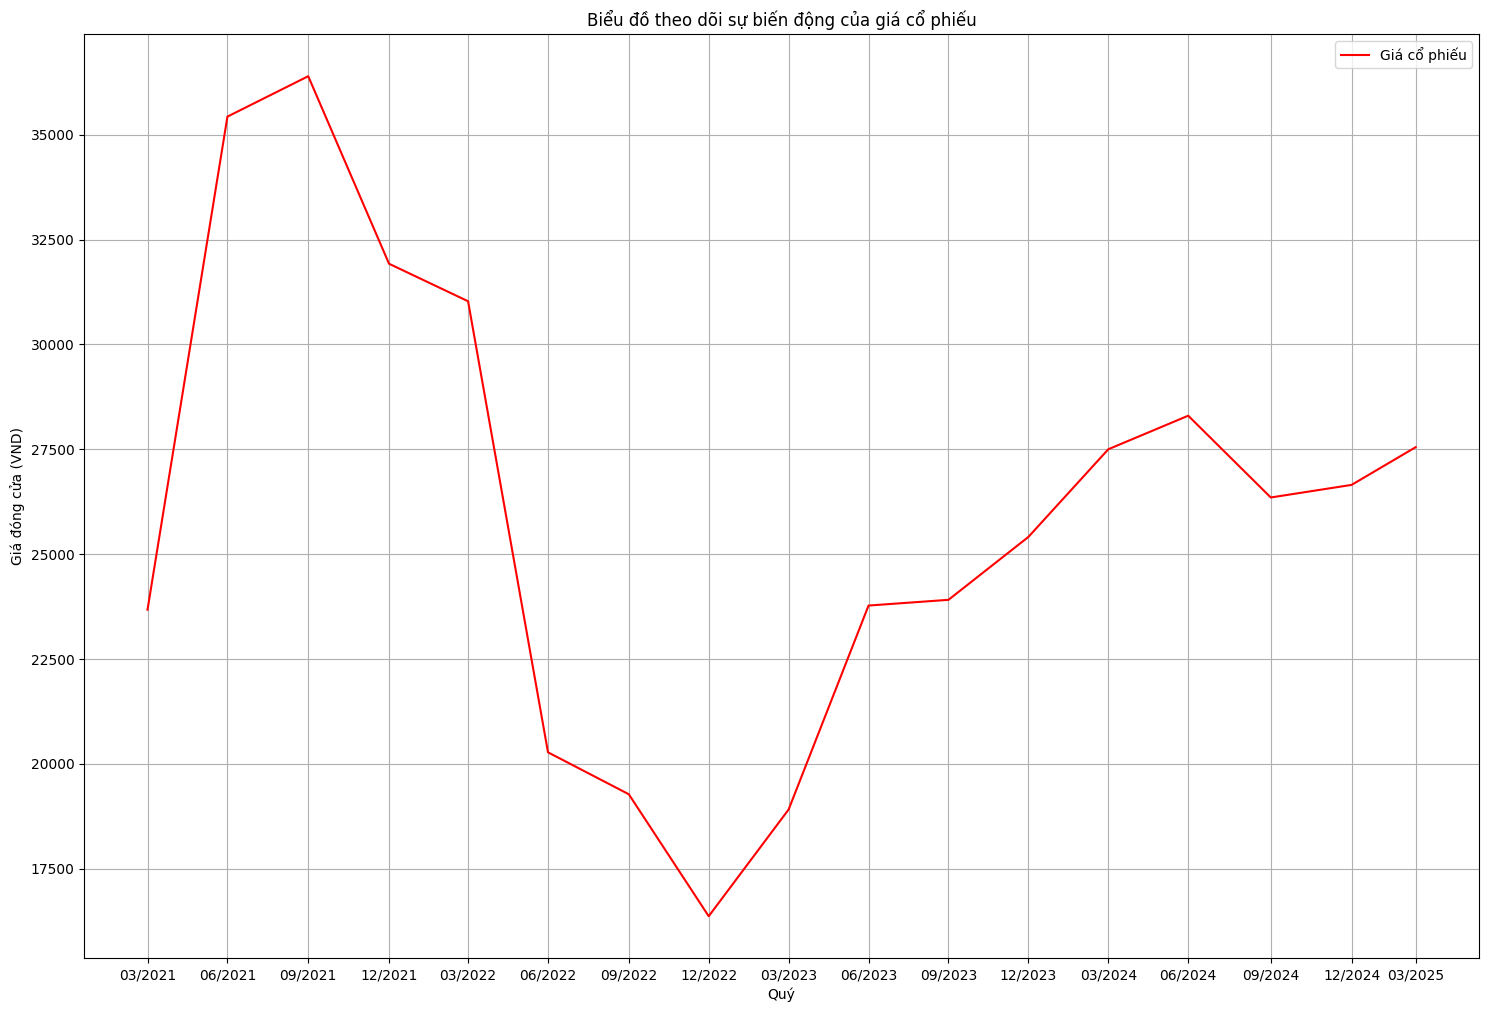

In [ ]:
plt.figure(figsize=(18,12))
plt.plot(df_price_analysis["NGÀY"], df_price_analysis["GIÁ ĐÓNG CỬA"], label="Giá cổ phiếu", color='red')
plt.xlabel("Quý")
plt.ylabel("Giá đóng cửa (VND)")
plt.title("Biểu đồ theo dõi sự biến động của giá cổ phiếu")
plt.legend()
plt.grid(True)
plt.xticks(df_price_analysis["NGÀY"], df_price_analysis["NGÀY"].dt.strftime('%m/%Y'))
plt.show()

# 1. Quan sát Biến động Giá (Dựa trên Biểu đồ)
Lịch sử giá cổ phiếu HPG trong giai đoạn quan sát thể hiện một chu kỳ kinh doanh hoàn chỉnh, và theo như đồ thị đã thể hiện thì có 3 giai đoạn rất rõ rệt, và có giai đoạn giảm rất bất thường, cụ thể như sau:

### Giai đoạn 1: Tăng trưởng Rất Mạnh (03/2021 - 9/2021)

Giá cổ phiếu tăng vọt từ vùng ~23.500 VND lên đỉnh cao nhất xấp xỉ 36.500 VND. Đây là một đợt tăng trưởng rất nhanh và mạnh.

### Giai đoạn 2: Sụt Giảm Sâu (Bất thường) (sau tháng 9/2021 - 12/2022)

Ngay sau khi đạt đỉnh, cổ phiếu bước vào một xu hướng giảm kéo dài và rất sâu (bear market).

Giá lao dốc không phanh, mất hơn 50% giá trị, và tạo đáy thấp nhất tại vùng ~16.500 VND vào cuối năm 2022. Đây là đợt sụt giảm bất thường nhất trong giai đoạn quan sát.

### Giai đoạn 3: Phục Hồi (12/2022 - 03/2025)

Từ vùng đáy cuối 2022, giá cổ phiếu bắt đầu xu hướng phục hồi, tăng dần trở lại và đạt mức ~27.500 VND vào cuối biểu đồ, mặc dù tăng không nhanh như giai đoạn đầu và có thời điểm giảm nhẹ (khoảng từ 6/2024 - 9/2024)nhưng xét về xu hướng thì vẫn đang tăng và trong giai đoạn phục hồi.

# 2. Phân tích Bối cảnh và Nguyên nhân Tác động

Các biến động giá mạnh mẽ trên không xảy ra ngẫu nhiên mà gắn liền với các yếu tố nội tại của HPG và bối cảnh vĩ mô.

### 2.1. Nguyên nhân Giai đoạn Tăng trưởng (2021)
Bối cảnh công ty (Vi mô): Đây là giai đoạn phát triển mạnh của ngành thép. HPG hưởng lợi trực tiếp khi:

Giá thép toàn cầu: Giá thép (đặc biệt là HRC) tăng lên mức cao nhất lịch sử do nhu cầu bùng nổ sau COVID-19 và đứt gãy chuỗi cung ứng. Mặc dù quý III năm 2021, giá thép có xu hướng giảm nhẹ (điều này cũng được phản ảnh đúng trên biểu đồ giai đoạn khoảng tháng 6/2021 giá cổ phiếu co xu hướng tăng chậm lại).

Kết quả kinh doanh: HPG vận hành tối đa công suất Khu liên hợp Dung Quất 1, ghi nhận lợi nhuận năm 2021 đạt kỷ lục lịch sử (34.520 tỷ đồng).

Bối cảnh thị trường (Vĩ mô):

Lãi suất rẻ: Chính sách tiền tệ nới lỏng và lãi suất tiền gửi ngân hàng ở mức rất thấp đã thúc đẩy một dòng tiền khổng lồ (làn sóng "nhà đầu tư F0") đổ vào thị trường chứng khoán.

Tâm lý hưng phấn: VN-Index liên tục lập đỉnh lịch sử, và các cổ phiếu blue-chip đầu ngành như HPG trở thành tâm điểm thu hút dòng tiền.

### 2.2. Nguyên nhân Giai đoạn Sụt Giảm Sâu (2022)
Bối cảnh công ty (Vi mô): Chu kỳ ngành thép đảo chiều 180 độ.

Nhu cầu giảm: Lạm phát toàn cầu tăng cao và chính sách thắt chặt tiền tệ khiến nhu cầu thép cho xây dựng và sản xuất sụt giảm mạnh.

Chi phí tăng: Giá nguyên vật liệu đầu vào (như than cốc) tăng vọt do xung đột Nga-Ukraine.

Tình hình xuất khẩu trong nước: Tính chung năm 2022, Việt Nam đã xuất khẩu khoảng 8,397 triệu tấn thép giảm 35,85% so với cùng kỳ năm 2021.

Kết quả kinh doanh: HPG chịu tác động kép, dẫn đến việc lần đầu tiên báo lỗ lịch sử gần 2.000 tỷ đồng vào Quý 4/2022.

Bối cảnh thị trường (Vĩ mô): Đây là mùa đông của thị trường chứng khoán Việt Nam.

Thắt chặt tiền tệ: Fed (Mỹ) và Ngân hàng Nhà nước Việt Nam đồng loạt tăng lãi suất mạnh để kiềm chế lạm phát, khiến dòng tiền "rẻ" bị rút khỏi thị trường.

Bán giải chấp: Tâm lý hoảng loạn và áp lực lãi suất đã kích hoạt làn sóng bán giải chấp (margin call) trên diện rộng, khiến ngay cả cổ phiếu cơ bản tốt như HPG cũng bị bán tháo.

### 2.3. Nguyên nhân Giai đoạn Phục Hồi (2023 - 2025)
Bối cảnh công ty (Vi mô): HPG vượt qua giai đoạn khó khăn nhất (vào khoảng nửa cuối năm 2022).

Công ty bắt đầu có lãi trở lại từ Quý 1/2023, chấm dứt chuỗi thua lỗ. Lợi nhuận phục hồi dần qua các quý, cho thấy doanh nghiệp đã qua đáy chu kỳ.

Bối cảnh thị trường (Vĩ mô):

Thị trường chung ổn định trở lại sau cú sập 2022. Lãi suất bắt đầu có xu hướng hạ nhiệt.

Tâm lý nhà đầu tư tích cực hơn, đặt cược vào sự phục hồi của nền kinh tế và kỳ vọng Chính phủ đẩy mạnh giải ngân vốn đầu tư công, vốn là yếu tố thúc đẩy trực tiếp nhu cầu tiêu thụ thép.

Kết luận
Giá cổ phiếu HPG biến động rất sát với chu kỳ kinh doanh của ngành thép và sức khỏe của nền kinh tế vĩ mô. Các đợt tăng và giảm giá mạnh (bất thường) trong giai đoạn 2021-2022 đều có nguyên nhân nền tảng rõ ràng, xuất phát từ sự thay đổi đột biến trong kết quả kinh doanh của doanh nghiệp (từ lãi kỷ lục sang lỗ lịch sử) và sự đảo chiều của chính sách tiền tệ (từ nới lỏng sang thắt chặt). Giai đoạn 2023-2025 là giai đoạn phục hồi khi những yếu tố tiêu cực nhất đã qua đi.

# II. Tiền xử lý dữ liệu

In [ ]:
# Lấy cột từ bảng Báo cáo Chỉ số tài chính
financial_columns = ['Biên lợi nhuận gộp', 'Biên lợi nhuận ròng', 'P/E', 'EPS (VNĐ/CP)', 'Tăng trưởng EPS', 'ROE LTM', 'Nợ phải trả / Vốn chủ sở hữu', 
                    'Khả năng thanh toán tổng quát', 'Vòng quay tài sản (vòng)', 'Giá trị sổ sách (VNĐ/CP)']

df_processed = df_financial_indicator.set_index('CHỈ TIÊU').T
df_processed.columns.name = None
df_financial_quarter = df_processed.loc[:, financial_columns]
df_financial_quarter.head(5)

,Biên lợi nhuận gộp,Biên lợi nhuận ròng,P/E,EPS (VNĐ/CP),Tăng trưởng EPS,ROE LTM,Nợ phải trả / Vốn chủ sở hữu,Khả năng thanh toán tổng quát,Vòng quay tài sản (vòng),Giá trị sổ sách (VNĐ/CP)
Q4/2024,0.1266,0.0815,14.093654,438.819779,-0.1417,0.1105,0.9581,2.043746,0.158261,17878.384826
Q3/2024,0.1393,0.0890,14.920453,472.612318,0.3708,0.1151,0.8911,2.122198,0.162472,17446.146994
Q2/2024,0.1327,0.0839,19.412489,518.938915,1.0667,0.1080,0.9011,2.109709,0.193639,16974.630099
Q1/2024,0.1346,0.0930,24.118159,448.792434,5.5652,0.0919,0.9119,2.096650,0.158330,16497.238964
Q4/2023,0.1300,0.0863,82.369601,511.244870,2.4927,0.0684,0.8260,2.210607,0.190339,17674.021829


In [ ]:
end_of_quarter = df_price_history.groupby(df_price_history['NGÀY'].dt.to_period('Q'), sort=False)['NGÀY'].max()
end_of_quarter = end_of_quarter[1:]    # Bỏ quý 1 năm 2025
end_of_quarter

quarter_prices = dict()

for quarter, date in end_of_quarter.items():
    start_date = date - datetime.timedelta(days=14)
    end_date = date + datetime.timedelta(days=14)

    date_filter = (df_price_history['NGÀY'] >= start_date) & (df_price_history['NGÀY'] <= end_date)
    df_filtered = df_price_history.loc[date_filter]

    avg_price = df_filtered['GIÁ ĐÓNG CỬA'].mean()
    quarter_prices[quarter] = avg_price


# Chuyển từ dict sang DataFrame
df_price_quarter = pd.DataFrame.from_dict(data=quarter_prices, orient='index')
df_price_quarter.columns = ['GIÁ ĐÓNG CỬA']
df_price_quarter.index = df_price_quarter.index.map(lambda p: f"Q{p.quarter}/{p.year}")

# Thêm cột THAY ĐỔI GIÁ và % THAY ĐỔI
df_price_quarter['THAY ĐỔI GIÁ'] = df_price_quarter['GIÁ ĐÓNG CỬA'].diff(-1)
df_price_quarter['% THAY ĐỔI'] = df_price_quarter['GIÁ ĐÓNG CỬA'].pct_change(-1) * 100
df_price_quarter.head(5)

,GIÁ ĐÓNG CỬA,THAY ĐỔI GIÁ,% THAY ĐỔI
Q4/2024,26562.500000,362.500000,1.383588
Q3/2024,26200.000000,-2676.190476,-9.267810
Q2/2024,28876.190476,1562.337662,5.719946
Q1/2024,27313.852814,2345.670996,9.394641
Q4/2023,24968.181818,968.181818,4.034091


In [ ]:
# Ghép 2 DataFrame vào làm một
df_final = pd.concat([df_price_quarter, df_financial_quarter], axis=1)
df_final.head(5)

,GIÁ ĐÓNG CỬA,THAY ĐỔI GIÁ,% THAY ĐỔI,Biên lợi nhuận gộp,Biên lợi nhuận ròng,P/E,EPS (VNĐ/CP),Tăng trưởng EPS,ROE LTM,Nợ phải trả / Vốn chủ sở hữu,Khả năng thanh toán tổng quát,Vòng quay tài sản (vòng),Giá trị sổ sách (VNĐ/CP)
Q4/2024,26562.500000,362.500000,1.383588,0.1266,0.0815,14.093654,438.819779,-0.1417,0.1105,0.9581,2.043746,0.158261,17878.384826
Q3/2024,26200.000000,-2676.190476,-9.267810,0.1393,0.0890,14.920453,472.612318,0.3708,0.1151,0.8911,2.122198,0.162472,17446.146994
Q2/2024,28876.190476,1562.337662,5.719946,0.1327,0.0839,19.412489,518.938915,1.0667,0.1080,0.9011,2.109709,0.193639,16974.630099
Q1/2024,27313.852814,2345.670996,9.394641,0.1346,0.0930,24.118159,448.792434,5.5652,0.0919,0.9119,2.096650,0.158330,16497.238964
Q4/2023,24968.181818,968.181818,4.034091,0.1300,0.0863,82.369601,511.244870,2.4927,0.0684,0.8260,2.210607,0.190339,17674.021829


# III. Lựa chọn các yếu tố nguy cơ (risk factors) tiềm năng cho mô hình tài chính

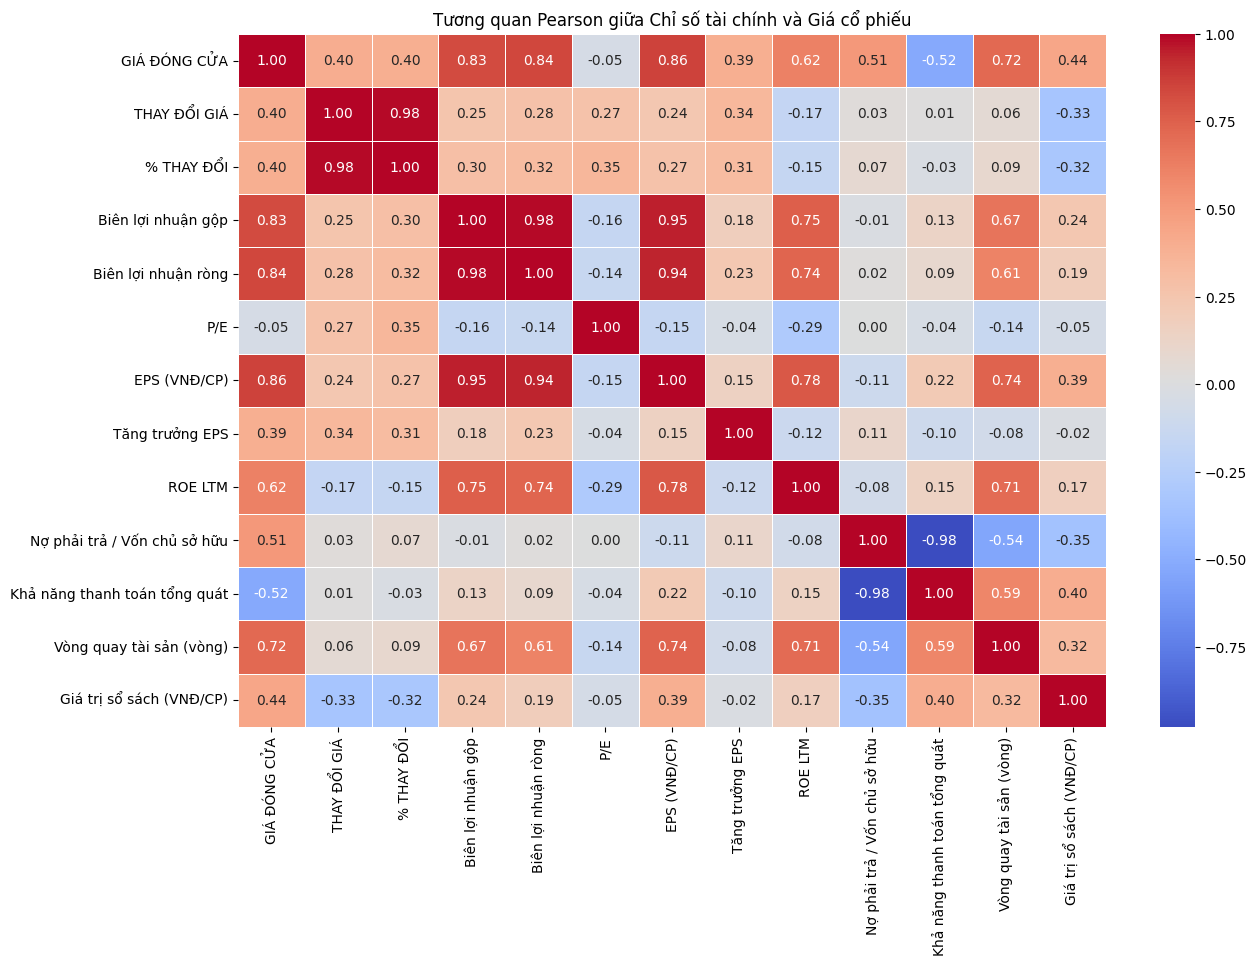

In [ ]:
# Tính độ tương quan Pearson của các Chỉ số tài chính với Giá cổ phiếu
correlation_matrix = df_final.corr(method="pearson")

plt.figure(figsize=(14, 9)) 
sns.heatmap(correlation_matrix,
            annot=True,     
            cmap='coolwarm', 
            fmt=".2f",       
            linewidths=.5)
   
plt.title('Tương quan Pearson giữa Chỉ số tài chính và Giá cổ phiếu')
plt.show()

# Giá cổ phiếu của công ty này có thể có mối quan hệ phụ thuộc vào những chỉ số tài chính nào?
- EPS (Lợi nhuận trên cổ phiếu) (0.86)

- Biên lợi nhuận ròng (0.84)

- Biên lợi nhuận gộp (0.83)

- Vòng quay tài sản (0.72)
##### Một điểm cần lưu ý: ma trận này cho thấy mối tương quan (correlation), không nhất thiết là quan hệ nhân quả (causation). Tương quan chỉ ra rằng các biến này có xu hướng di chuyển cùng nhau, chứ không khẳng định 100% rằng chỉ số này gây ra sự thay đổi của giá. Lý do tôi chọn các chỉ số trên là:

- EPS (VNĐ/CP) (0.86): Đây là mối quan hệ mạnh nhất trên biểu đồ. Điều này rất hợp lý, vì EPS (Lợi nhuận trên mỗi cổ phiếu) là thước đo cơ bản về khả năng sinh lời của công ty. Khi EPS tăng, giá cổ phiếu có xu hướng tăng mạnh theo.

- Biên lợi nhuận ròng (0.84): Tương tự EPS, biên lợi nhuận ròng cho thấy công ty kiếm được bao nhiêu đồng lợi nhuận từ mỗi đồng doanh thu. Khi chỉ số này càng cao, sức khỏe tài chính càng tốt, giá cổ phiếu có xu hướng tăng.

- Biên lợi nhuận gộp (0.83): Mối tương quan rất mạnh, cho thấy khả năng kiểm soát giá vốn hàng bán của công ty ảnh hưởng lớn đến nhận định của thị trường về giá cổ phiếu.

- Vòng quay tài sản (ròng) (0.72): Cho thấy công ty sử dụng tài sản hiệu quả như thế nào để tạo ra doanh thu. Hiệu quả càng cao, giá cổ phiếu càng có xu hướng tăng.